## Predicting Heart Disease

### Introduction

This project focuses on analyzing the Heart Disease dataset from the UCI Machine Learning Repository to understand the relationship between various health indicators, such as age, cholesterol levels, and blood pressure, and the likelihood of developing heart disease. The goal is to build and evaluate predictive models using supervised learning techniques, including Logistic Regression, Decision Trees, and Random Forests. By simplifying the target variable into two categories—heart disease present or absent—this project aims to create a more practical and actionable tool for early detection of heart disease. The project also incorporates exploratory data analysis (EDA), feature scaling, and hyperparameter tuning to optimize model performance. Such models have significant clinical relevance, as they can aid healthcare professionals in identifying at-risk patients, informing treatment decisions, and improving early intervention strategies.

### Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(100)

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
df = pd.read_csv('heart_disease_uci.csv', index_col = None)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.rename(columns = {'num': 'target'}, inplace = True)

In [4]:
df['target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
target,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [7]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

#### Addressing Missing Data

Removing rows with missing data would result in the loss of a significant amount of data. Therefore, I fill in missing numerical data with the column's median and missing categorical data with the column's mode.

In [8]:
df["trestbps"].fillna(df["trestbps"].median(), inplace = True)
df["chol"].fillna(df["chol"].median(), inplace = True)
df["fbs"].fillna(df["fbs"].mode()[0], inplace = True)
df["restecg"].fillna(df["restecg"].mode()[0], inplace = True)
df["thalch"].fillna(df["thalch"].median(), inplace = True)
df["exang"].fillna(df["exang"].mode()[0], inplace = True)
df["oldpeak"].fillna(df["oldpeak"].median(),inplace = True)
df["slope"].fillna(df["slope"].mode()[0],inplace = True)
df["thal"].fillna(df["thal"].mode()[0],inplace = True)

In [9]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
target        0
dtype: int64

The 'ca' column is missing 611 values which is about two-thirds of the entire data set. Since it seems like a lot of data to impute with the column's median or mode, it will be removed. The clinical relavance of this column is very high because it shows the number of major blood vessels that are blocked during a fluoroscopy test, directly relating to heart disease. However, missing that amount of data leads me to be unable to use it. Perhaps in future iterations of this project I could try imputing with the mode. Or perhaps using more data with this column filled in would be better for model training and better clinical results.

In [10]:
#dropping ca because about 2/3 of data is null
#dropping id because not necessary
df = df.drop(columns = ['ca', 'id', 'dataset'], axis = 1)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  thal      920 non-null    object 
 12  target    920 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 81.0+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.0,77.0
trestbps,920.0,131.995652,18.451300,0.0,120.00,130.0,140.0,200.0
chol,920.0,199.908696,109.040171,0.0,177.75,223.0,267.0,603.0
thalch,920.0,137.692391,25.145235,60.0,120.00,140.0,156.0,202.0
oldpeak,920.0,0.853261,1.058049,-2.6,0.00,0.5,1.5,6.2
target,920.0,0.995652,1.142693,0.0,0.00,1.0,2.0,4.0


Here we can see that columns such as 'trestbps' (resting blood pressure) and 'chol' (cholesterol) have values of 0 which are physiologically impossible. It probably means there are missing data, requiring further inspection and data imputation with the mean of those columns.

In [13]:
df[df['trestbps'] == 0].shape[0]

1

In [14]:
df[df['chol'] == 0].shape[0]

172

In [15]:
df['trestbps'].replace(0, df['trestbps'].median(), inplace=True)
df['chol'].replace(0, df['chol'].median(), inplace=True)

#### num
- Value 0: <50% diameter narrowing - heart disease not present
- Values 1, 2, 3, 4: >50% diameter narrowing - heart disease is present


In [16]:
df['prev target'] = df['target']

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target,prev target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0,0


In [18]:
df['target'] = df['target'] > 0
df['target'].head()

0    False
1     True
2     True
3    False
4    False
Name: target, dtype: bool

In [19]:
df['target'] = df['target'].map({False: 0, True: 1})
df['target'].head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [20]:
df['target'].unique()

array([0, 1], dtype=int64)

In [21]:
cat_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [22]:
df = pd.get_dummies(df, columns = cat_columns, drop_first = True)
df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,target,prev target,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,True,150.0,2.3,0,0,True,False,False,True,False,False,False,False,False,False,False
1,67,160.0,286.0,False,108.0,1.5,1,2,True,False,False,False,False,False,True,True,False,True,False
2,67,120.0,229.0,False,129.0,2.6,1,1,True,False,False,False,False,False,True,True,False,False,True
3,37,130.0,250.0,False,187.0,3.5,0,0,True,False,True,False,True,False,False,False,False,True,False
4,41,130.0,204.0,False,172.0,1.4,0,0,False,True,False,False,False,False,False,False,True,True,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   trestbps                  920 non-null    float64
 2   chol                      920 non-null    float64
 3   fbs                       920 non-null    bool   
 4   thalch                    920 non-null    float64
 5   oldpeak                   920 non-null    float64
 6   target                    920 non-null    int64  
 7   prev target               920 non-null    int64  
 8   sex_Male                  920 non-null    bool   
 9   cp_atypical angina        920 non-null    bool   
 10  cp_non-anginal            920 non-null    bool   
 11  cp_typical angina         920 non-null    bool   
 12  restecg_normal            920 non-null    bool   
 13  restecg_st-t abnormality  920 non-null    bool   
 14  exang_True

### Visualizations

#### Target

- 0: No heart disease
- 1: Heart disease diagnosed

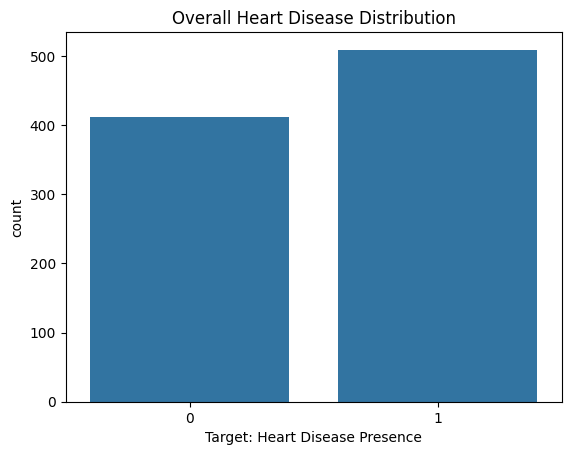

In [24]:
sns.countplot(x = df['target'])
plt.title('Overall Heart Disease Distribution')
plt.xlabel('Target: Heart Disease Presence')
plt.show()

#### Target Based on Type of Heart Disease

Recall that 1, 2, 3, and 4 represent >50% diameter narrowing of blood vessels, indicating presence of some type of heart disease.

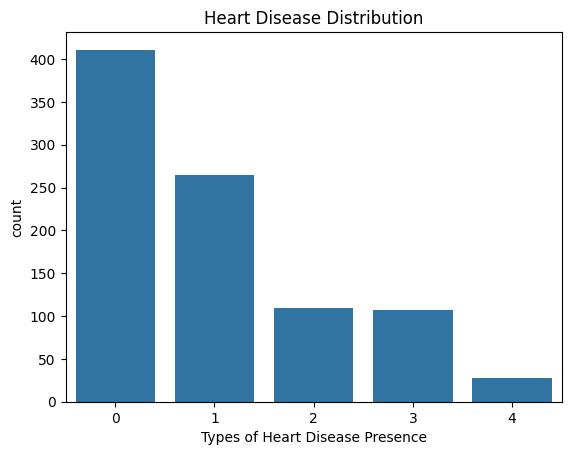

In [25]:
sns.countplot(x = df['prev target'])
plt.title('Heart Disease Distribution')
plt.xlabel('Types of Heart Disease Presence')
plt.show()

#### Age

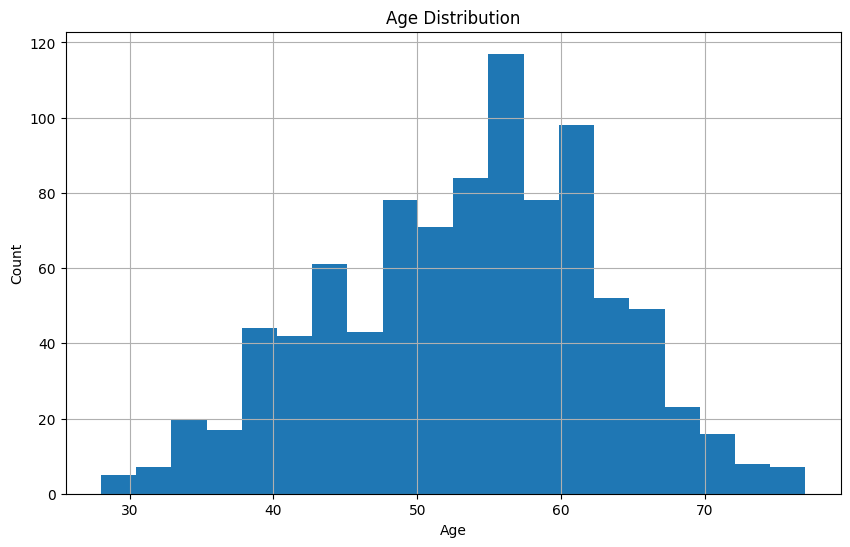

In [26]:
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

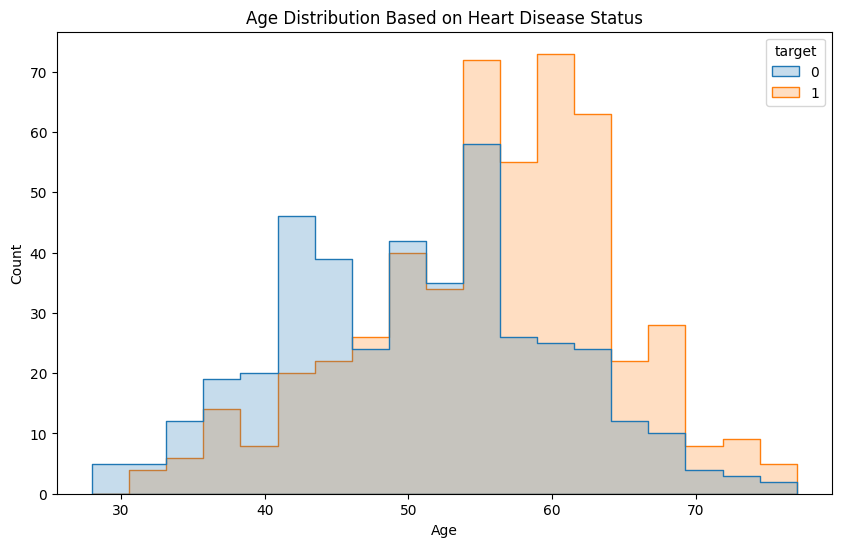

In [27]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'age', hue = 'target', element = 'step', stat = 'count')
plt.title('Age Distribution Based on Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Correlation Matrix

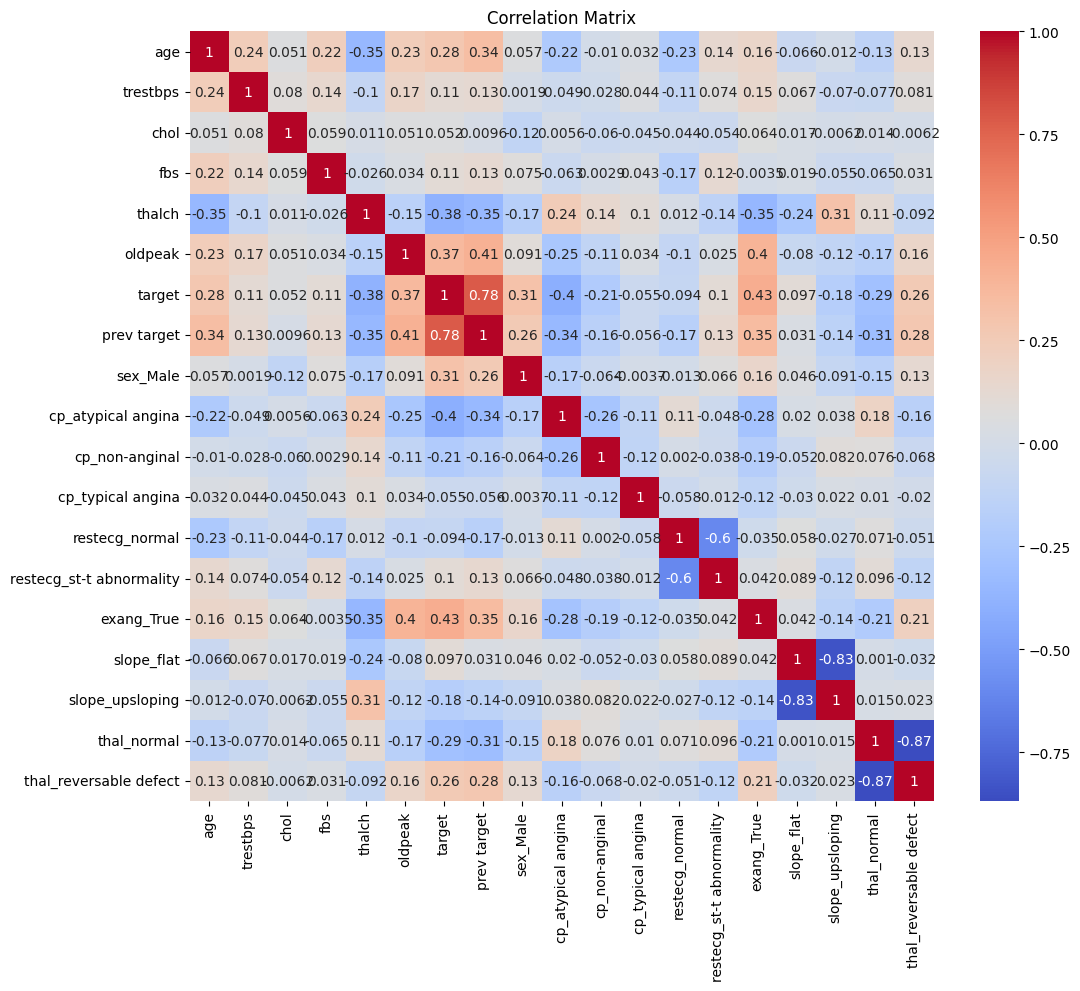

In [28]:
plt.figure(figsize = (12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Standardizing and Splitting into Train and Test

In [29]:
to_drop = ['target', 'prev target']
x = df.drop(columns = to_drop, axis = 1)
y = df['target']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100, stratify = y)

In [31]:
num_columns = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak']
scaler = StandardScaler()
x_train_scaled = x_train
x_test_scaled = x_test
x_train_scaled[num_columns] = scaler.fit_transform(x_train[num_columns])
x_test_scaled[num_columns] = scaler.transform(x_test[num_columns])

In [32]:
print(x_train.shape)
print(x_test.shape)
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(736, 17)
(184, 17)
(736, 17)
(184, 17)
(736,)
(184,)


### Logistic Regression

#### Hyperparameter Tuning for Random Forest

In [33]:
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver' : ['liblinear']
}

In [34]:
lr_grid = GridSearchCV(
    LogisticRegression(max_iter = 1000, random_state = 100),
    param_grid = lr_param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 1
)

In [35]:
lr_grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=100),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [36]:
print(f'Logistic Regression Best Parameters: {lr_grid.best_params_}')

Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


#### Predicting with Best Parameters

In [37]:
lr_best = lr_grid.best_estimator_
lr_best.fit(x_train_scaled, y_train)
y_pred_lr = lr_best.predict(x_test_scaled)

#### Evaluating Logistic Regression Model with Best Parameters

In [38]:
def model_eval(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average = 'binary')
    recall = recall_score(y_true, y_pred, average = 'binary')
    f1 = f1_score(y_true, y_pred, average = 'binary')
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

In [39]:
model_eval(y_test, y_pred_lr)

Accuracy: 0.8043
Precision: 0.8000
Recall: 0.8627
F1 Score: 0.8302

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        82
           1       0.80      0.86      0.83       102

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



##### Confusion Matrix

In [40]:
def conf_matrix_vis(y_true, y_pred, model_name = 'Model'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = 'd')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

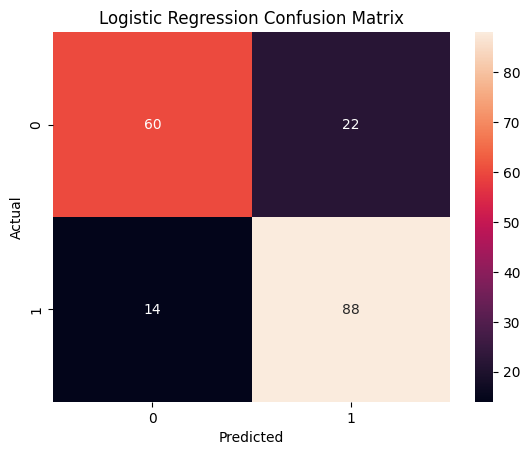

In [41]:
conf_matrix_vis(y_test, y_pred_lr, 'Logistic Regression')

##### ROC Curve

In [43]:
def get_roc_curve(best_model, x_test, y_true, model_name = 'Model'):
    y_prob = best_model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color = 'blue', lw = 2, label = f'{model_name} (auc = {roc_auc:.4})')
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([-0.05, 1.05])
    ax.set_title(f'{model_name} ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = "lower right")
    
    plt.show()

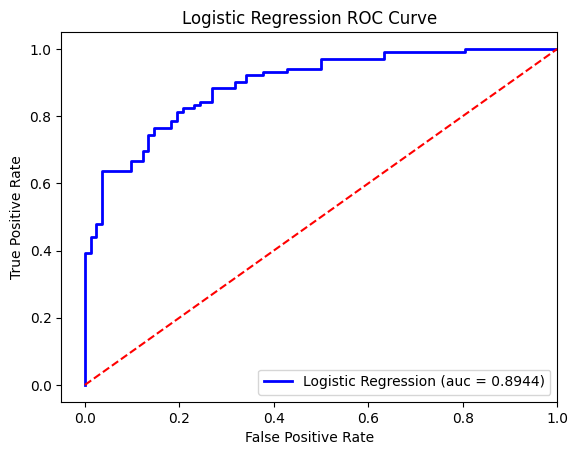

In [44]:
get_roc_curve(lr_best, x_test_scaled, y_test, 'Logistic Regression')

#### Evaluating Logistic Regression Performance

- Accuracy: 80.43%
- Precision: 80.00%
- Recall: 86.27%
- F1 Score: 83.02%
- AUC: 0.8944

The logistic regression model shows a solid performance with high recall, indicating its effectiveness in identifying positive cases (heart disease). The precision is also decent, suggesting that when it predicts a positive case, it is likely correct.

### Decision Trees

#### Hyperparameter Tuning for Decision Trees

In [45]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [46]:
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state = 100),
    param_grid = dt_param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

In [47]:
dt_grid.fit(x_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [48]:
print(f'Decision Trees Best Parameters: {dt_grid.best_params_}')

Decision Trees Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20}


In [49]:
dt_best = dt_grid.best_estimator_

dt_best.fit(x_train, y_train)
y_pred_dt = dt_best.predict(x_test)

#### Evaluating Decision Tree Model with Best Parameters

##### Evaluation Metrics

In [50]:
model_eval(y_test, y_pred_dt)

Accuracy: 0.7880
Precision: 0.7647
Recall: 0.8922
F1 Score: 0.8235

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        82
           1       0.76      0.89      0.82       102

    accuracy                           0.79       184
   macro avg       0.80      0.78      0.78       184
weighted avg       0.79      0.79      0.78       184



##### Confusion Matrix

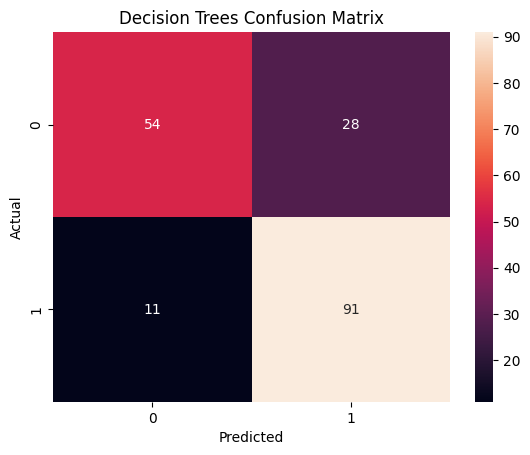

In [51]:
conf_matrix_vis(y_test, y_pred_dt, 'Decision Trees')

##### ROC Curve

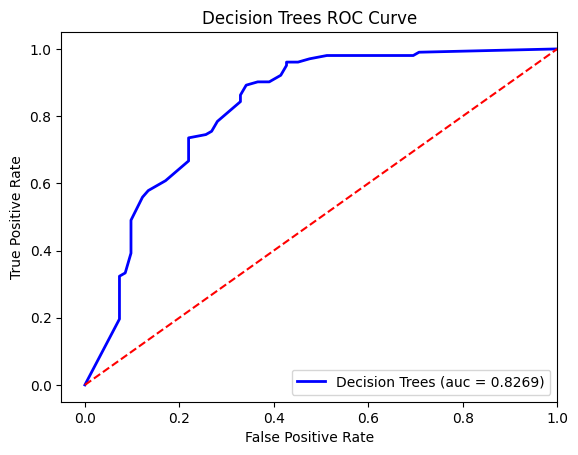

In [52]:
get_roc_curve(dt_best, x_test, y_test, 'Decision Trees')

#### Evaluating Decision Trees Classifier

- Accuracy: 78.80%
- Precision: 76.47%
- Recall: 89.22%
- F1 Score: 82.35%
- AUC: 0.8269

The decision tree model has a lower overall accuracy and precision compared to logistic regression. Although it has a high recall, meaning it correctly identifies many positive cases, it struggles with precision, indicating a higher number of false positives. This suggests it might be overfitting, capturing noise in the training data.

### Random Forest Classifier

#### Hyperparameter Tuning for Random Forest

In [53]:
rf_param_grid = {
    'n_estimators': [100, 200, 500, 800],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20]
}

In [54]:
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state = 100),
    param_grid = rf_param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 1
)

In [55]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [None, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500, 800]},
             scoring='accuracy', verbose=1)

In [56]:
print(f'Random Forest Best Parameters: {rf_grid.best_params_}')

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


#### Predicting with Best Parameters

In [57]:
rf_best = rf_grid.best_estimator_
rf_best.fit(x_train, y_train)
y_pred_rf = rf_best.predict(x_test)

#### Evaluating Random Forest Model with Best Parameters

##### Evaluation Metrics

In [58]:
model_eval(y_test, y_pred_rf)

Accuracy: 0.8152
Precision: 0.7982
Recall: 0.8922
F1 Score: 0.8426

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        82
           1       0.80      0.89      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



##### Confusion Matrix

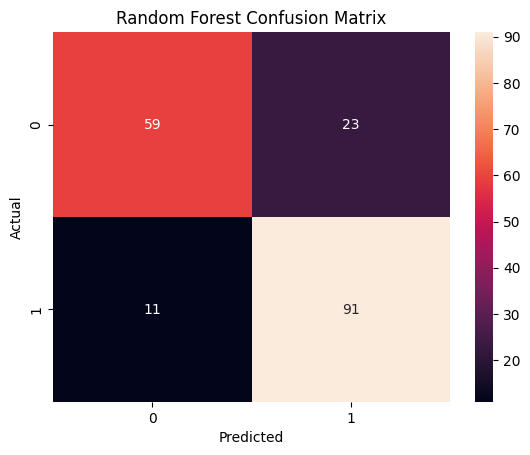

In [59]:
conf_matrix_vis(y_test, y_pred_rf, 'Random Forest')

##### ROC Curve

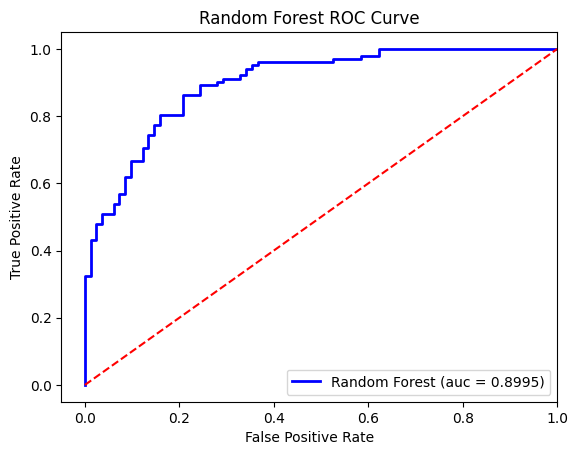

In [60]:
get_roc_curve(rf_best, x_test, y_test, 'Random Forest')

#### Evaluating Random Forest Model

- Accuracy: 81.52%
- Precision: 79.82%
- Recall: 89.22%
- F1 Score: 84.26%
- AUC: 0.8995

The random forest model outperforms both logistic regression and decision tree models in accuracy and F1 score. Its precision is slightly lower than logistic regression, but it maintains a high recall, effectively identifying heart disease cases. The AUC score indicates good overall model performance, making it a strong candidate for detecting heart disease.

### Conclusion and Clinical Relevance

Among the models evaluated, the random forest classifier shows the best overall performance, balancing accuracy, precision, and recall effectively. Logistic regression follows closely behind, performing well in terms of recall and F1 score. The decision tree demonstrates high recall but suffers from lower accuracy and precision. Given the clinical implications of misclassifying heart disease cases, the random forest model would be the most suitable for this application. It can effectively identify at-risk patients while maintaining a lower rate of false positives compared to the other models.

In a clinical setting, a model with high recall is crucial as it ensures that most patients with heart disease are identified, potentially leading to timely interventions. The balance between precision and recall is important to avoid unnecessary anxiety and further testing for patients who do not have the condition. The random forest model’s high AUC further supports its reliability in decision-making for patient management related to heart disease detection.